Project: Investigate a Dataset (TMDb_Movies Dataset)
    

Table of Contents
Introduction
Data Wrangling
Exploratory Data Analysis
Conclusions

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


 <a id='intro'></a>

### over view

> **Tip**: this report is about data analysis of movies according to genres , revenue,budget and rating and it help us to find the best of movies that people attracted to them and how much the production team pay for that we get data from this link https://www.kaggle.com/tmdb/tmdb-movie-metadata

 ### Question(s) for Analysis
     1-what's the most produces year of movies?
     2-what's the most profitable according to year?
     3-what's the most productive type of movies?
     4-what's the most profitable type of movies ?
     5-what's the most popular movies genre?
     

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import pandas as pd

 ### General proporties
 1-importing data and check it
 2-look at data an choose from it the coloumns we need 
 3-delete from the table the coloumns that we willn't use
 4-check the coloums that have unknown value and if it will affect on analysis we will remove this coloums
 5-check data with less missing value we will clean it
 6-remove the duplicated row

   
 

importing data and check it,look at data and choose from coloums we need.

In [3]:
df=pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,popularity.1,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,33.985763,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,29.419936,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,14.112507,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,12.173104,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,10.335014,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


1-cleaning data by convert nan value in numerical coloums to zero
2-check null value
3-drop coloumns which has more null value and willn't be benfit for analysis
4-check null value again and drop it 
5-check duplicates row and drop it
6-check data types and covert numerical value from float to integer and convert object to string 

In [4]:

movies_tmdb_rev=['budget_adj','revenue_adj','runtime']
df[movies_tmdb_rev]=df[movies_tmdb_rev].replace(0,np.nan)
df.head()

,id,imdb_id,popularity,popularity.1,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,33.985763,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,29.419936,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,14.112507,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,12.173104,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,10.335014,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


delete from the table the coloumns that we willn't need

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
popularity.1               0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [6]:
df_movies=df.drop(['imdb_id','cast','homepage','tagline','overview','release_date','director','keywords','production_companies'],axis=1)
df_movies.head()
 

,id,popularity,popularity.1,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,33.985763,1513528810,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,29.419936,378436354,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,14.112507,295238201,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,12.173104,2068178225,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,10.335014,1506249360,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015,174799923.1,1.385749e+09


In [7]:
df_movies.isnull().sum()

id                   0
popularity           0
popularity.1         0
revenue              0
original_title       0
runtime             31
genres              23
vote_count           0
vote_average         0
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64

In [8]:
movies_tmdb=df_movies.dropna()
movies_tmdb.head()

,id,popularity,popularity.1,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,33.985763,1513528810,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,29.419936,378436354,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,14.112507,295238201,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,12.173104,2068178225,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,10.335014,1506249360,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015,174799923.1,1.385749e+09


In [9]:
print(movies_tmdb.shape)

(3855, 12)


In [10]:
movies_tmdb.isnull().sum()

id                0
popularity        0
popularity.1      0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [11]:
movies_tmdb.duplicated().sum()

1

In [12]:
movies_tmdb=movies_tmdb.drop_duplicates()
movies_tmdb.head()

,id,popularity,popularity.1,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,33.985763,1513528810,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,29.419936,378436354,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,14.112507,295238201,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,12.173104,2068178225,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,10.335014,1506249360,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015,174799923.1,1.385749e+09


In [13]:
movies_tmdb.dtypes

id                  int64
popularity        float64
popularity.1      float64
revenue             int64
original_title     object
runtime           float64
genres             object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [14]:
integer=['revenue_adj','budget_adj']
movies_tmdb[integer]=movies_tmdb[integer].applymap(np.int64)
movies_tmdb.head()

,id,popularity,popularity.1,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,33.985763,1513528810,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939,1392445893
1,76341,28.419936,29.419936,378436354,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939,348161292
2,262500,13.112507,14.112507,295238201,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955,271619025
3,140607,11.173104,12.173104,2068178225,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919,1902723130
4,168259,9.335014,10.335014,1506249360,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015,174799923,1385748801


In [15]:
movies_tmdb['profit'] = movies_tmdb['revenue']-movies_tmdb['budget_adj']
movies_tmdb['profit'] = movies_tmdb['profit'].apply(np.int64)
movies_tmdb.head()

,id,popularity,popularity.1,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,33.985763,1513528810,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939,1392445893,1375528871
1,76341,28.419936,29.419936,378436354,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939,348161292,240436415
2,262500,13.112507,14.112507,295238201,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955,271619025,194038246
3,140607,11.173104,12.173104,2068178225,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919,1902723130,1884178306
4,168259,9.335014,10.335014,1506249360,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015,174799923,1385748801,1331449437


In [16]:
movies_tmdb['genres']=movies_tmdb['genres'].apply(np.str_)


In [17]:
movies_tmdb.dtypes

id                  int64
popularity        float64
popularity.1      float64
revenue             int64
original_title     object
runtime           float64
genres             object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj          int64
revenue_adj         int64
profit              int64
dtype: object

In [18]:
print(movies_tmdb.shape)

(3854, 13)


In [19]:
movies_tmdb.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'popularity.1'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>,
        <AxesSubplot:title={'center':'profit'}>, <AxesSubplot:>]],
      dtype=object)

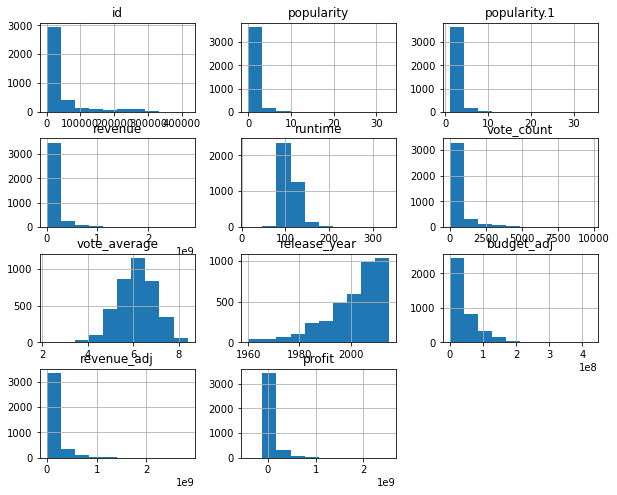

In [20]:
movies_tmdb.hist(figsize=(10,8))

what's the most year of producation of movies?

what's the most produces year of movies ? 
it appears for us that number of movies increases gradully by year

<AxesSubplot:>

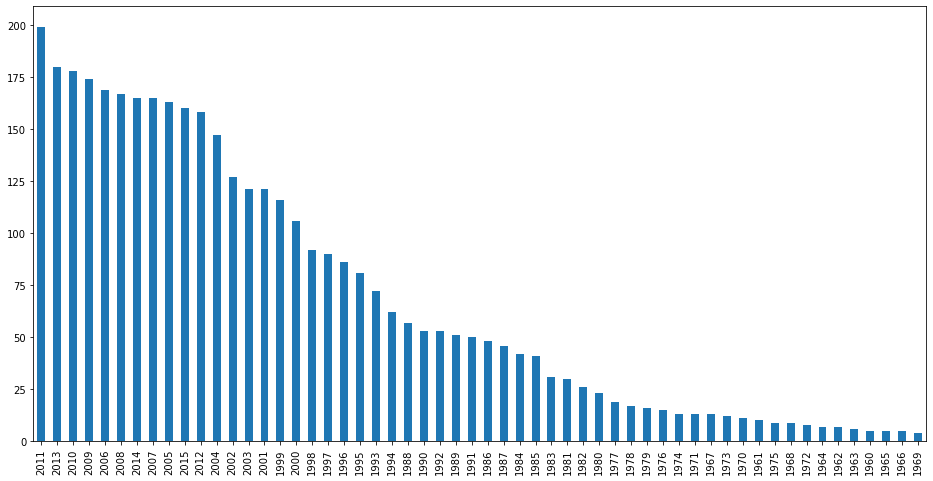

In [21]:
movies_tmdb['release_year'].value_counts().plot(kind='bar',figsize=(16,8))



tmdb_genres=tmdb


what's the most profitable according to year? we found the profit of movies increases gradually by year

,id,popularity,popularity.1,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,33.985763,1513528810,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939,1392445893,1375528871
1,76341,28.419936,29.419936,378436354,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939,348161292,240436415
2,262500,13.112507,14.112507,295238201,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955,271619025,194038246
3,140607,11.173104,12.173104,2068178225,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919,1902723130,1884178306
4,168259,9.335014,10.335014,1506249360,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015,174799923,1385748801,1331449437


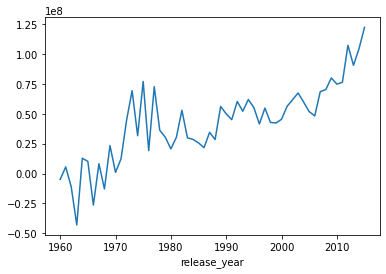

In [22]:
movies_tmdb.groupby('release_year').profit.mean().plot()
movies_tmdb.head()

we can estimate the profit mean as below

In [23]:
movies_tmdb['profit'].describe()


count    3.854000e+03
mean     6.344662e+07
std      1.508990e+08
min     -4.139124e+08
25%     -5.129096e+06
50%      1.414312e+07
75%      7.415011e+07
max      2.540619e+09
Name: profit, dtype: float64

<AxesSubplot:>

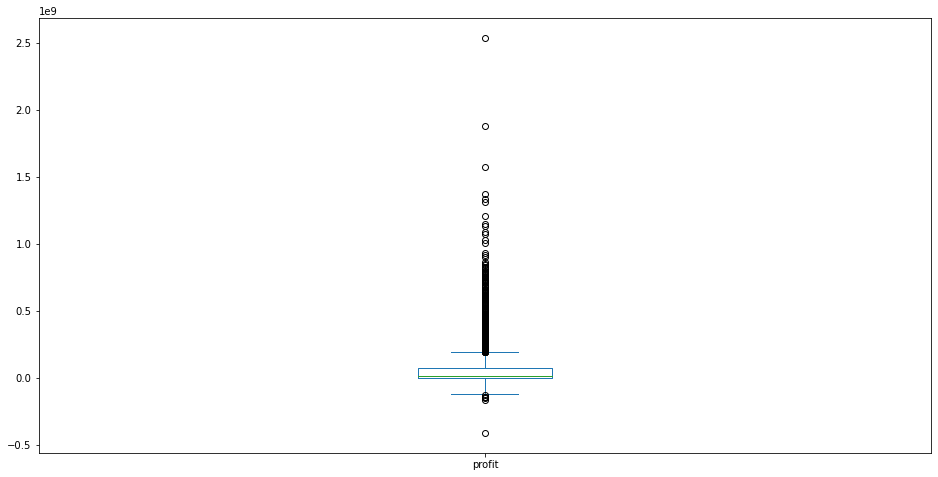

In [24]:
movies_tmdb['profit'].plot(kind='box',figsize=(16,8))

we can check the relation between profit and budget from this plot 

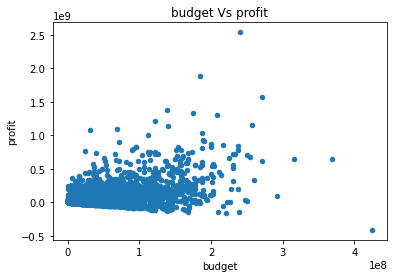

In [25]:
movies_tmdb.plot(x='budget_adj',y='profit',kind='scatter')
plt.title('budget Vs profit')
plt.xlabel('budget')
plt.ylabel('profit');

we use split to split coloumn of genres to make it easy for analysing data
and add the column after splitting to table to make more analysis

In [26]:
genres_df = movies_tmdb['genres'].str.split("|", expand=True)

In [27]:
genres_movies = genres_df.stack()

genres_movies = pd.DataFrame(genres_df)
genres_movies.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [28]:
 
genres_movies_count = genres_df.stack()

genres_movies_count= pd.DataFrame(genres_movies_count)
genres_movies_count.head()


0
0 0           Action
  1        Adventure
  2  Science Fiction
  3         Thriller
1 0           Action

what's the most productive type of movies? from the table we find drama movies is the most productive type of movies

In [29]:
genres_movies_count.rename(columns={0:'genres'}, inplace=True)
genres_movies_count.genres.value_counts()

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
Name: genres, dtype: int64

<AxesSubplot:ylabel='genres'>

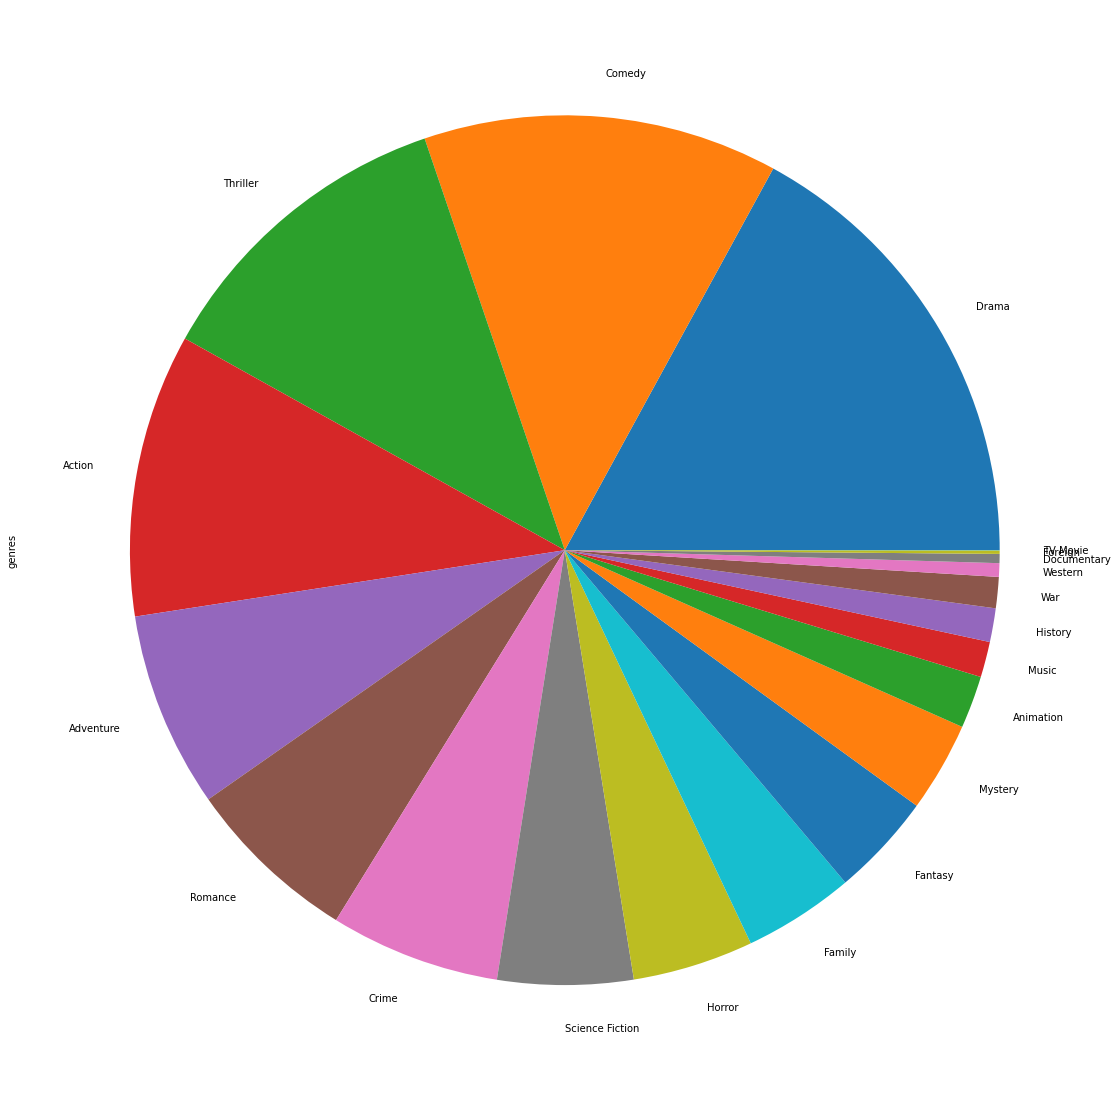

In [30]:
genres_movies_count.genres.value_counts().plot(kind='pie',figsize=(20,20))

In [31]:
movies_tmdb['genres_new']=genres_df
movies_tmdb.head(10)

ValueError: Wrong number of items passed 5, placement implies 1

what's the most profitable type of movies according to genre? we found that animation is the most profitable type of movies

Text(0, 0.5, 'profit')

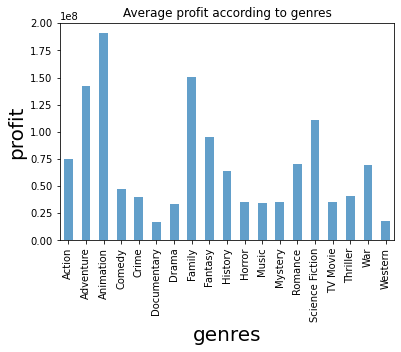

In [182]:
revenue_mean =movies_tmdb.groupby('genres_new')['profit'].mean()
revenue_mean.plot(kind='bar', title='Average profit according to genres', alpha=0.7);
plt.xlabel('genres', fontsize=20)
plt.ylabel('profit', fontsize=20)

what's the most popular type of movies according to genre? we found that animation and adventure is the most popular type of movie

Text(0, 0.5, 'vote average')

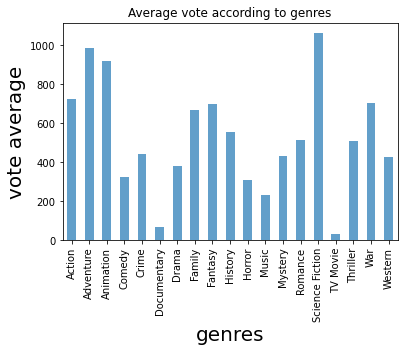

In [202]:
vote_average=movies_tmdb.groupby('genres_new')['vote_count'].mean()
vote_average.plot(kind='bar', title='Average vote according to genres', alpha=0.7);
plt.xlabel('genres', fontsize=20)
plt.ylabel('vote average', fontsize=20)

In [ ]:
view_data = input("Would you like to view 5 rows of individual trip data? Enter yes or no?")
start_loc = 0
while (view_data=='yes'):
    print(df.iloc[0:5])
    start_loc += 5
    view_display = input("Do you wish to continue?: ").lower()
    if start_loc+=5:
        continue

### conclusion 
from this data study we know alot of things that will be benefit for producer we found that a great number of people vote on animation and adventure and science fiction movies and a few number of people vote on documentry and this also appears obviously when we revise the profit for each type of movies we found that animation and adventure movies are movies which get high profit commparing to other movies and from this data analysis we found that number of movies produces is increasing gradullyby years which means that the production of movies by year play an important role in income for country and this also appear when we check the profit according to years